In [15]:
!pip install datasets
!pip install nltk
!pip install gensim

In [89]:
import numpy as np
from datasets import load_dataset
from gensim.models import Word2Vec
import gensim
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [49]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [50]:
 ds = load_dataset("dalopeza98/isear-cleaned-dataset")

In [51]:
num_to_emotion = ["anger", "disgust", "fear", "guilt", "joy", "sadness", "shame"]

In [52]:
ds_train = ds['train']
ds_test = ds['test']

In [53]:
# extract train/test text and labels
train_texts = [entry['text'] for entry in ds_train]
train_labels = [entry['label'] for entry in ds_train]
test_texts = [entry['text'] for entry in ds_test]
test_labels = [entry['label'] for entry in ds_test]

In [54]:
# tokenize text
def preprocess_text(texts):
    return [word_tokenize(text.lower()) for text in texts]

tokenized_train = preprocess_text(train_texts)
tokenized_test = preprocess_text(test_texts)

In [55]:
word2vec_model = Word2Vec(sentences=tokenized_train, vector_size=100, window=5, min_count=2, workers=4)

In [56]:
# turn tokenized samples into embedded vectors
def vectorize_text(text, model):
    vectors = [model.wv[word] for word in text if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

In [57]:
X_train = np.array([vectorize_text(text, word2vec_model) for text in tokenized_train])
X_test = np.array([vectorize_text(text, word2vec_model) for text in tokenized_test])


In [58]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [83]:
# train svm classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [84]:
y_pred_svm = svm_model.predict(X_test)

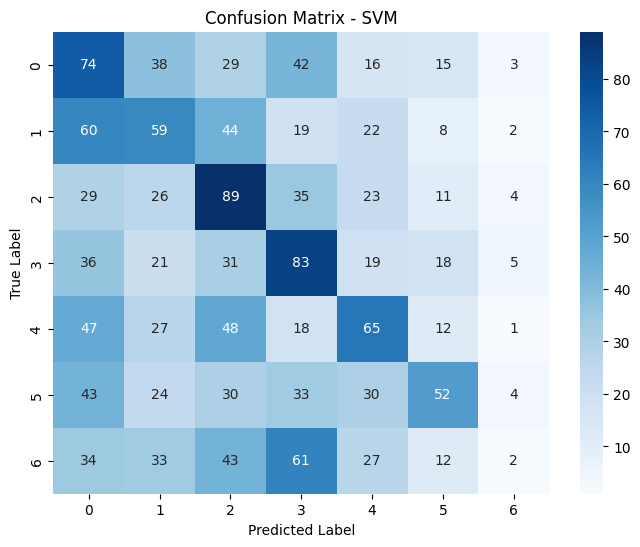

Classification Report for SVM Model:
              precision    recall  f1-score   support

           0       0.23      0.34      0.27       217
           1       0.26      0.28      0.27       214
           2       0.28      0.41      0.34       217
           3       0.29      0.39      0.33       213
           4       0.32      0.30      0.31       218
           5       0.41      0.24      0.30       216
           6       0.10      0.01      0.02       212

    accuracy                           0.28      1507
   macro avg       0.27      0.28      0.26      1507
weighted avg       0.27      0.28      0.26      1507

Accuracy: 28.14%


In [90]:
cm = confusion_matrix(y_test, y_pred_svm)

# plot svm confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Classification Report for SVM Model:")
print(classification_report(y_test, y_pred_svm))

accuracy = accuracy_score(y_test, y_pred_svm)

print(f"Accuracy: {accuracy * 100:.2f}%")

In [76]:
# random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

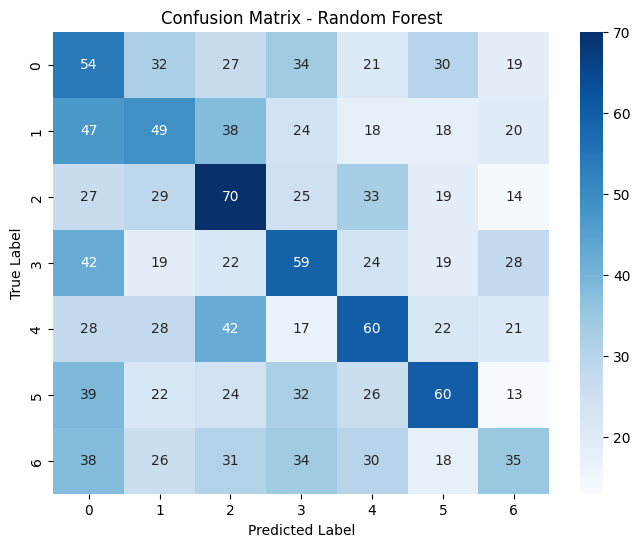

Classification Report for Random Forest Model:
              precision    recall  f1-score   support

           0       0.20      0.25      0.22       217
           1       0.24      0.23      0.23       214
           2       0.28      0.32      0.30       217
           3       0.26      0.28      0.27       213
           4       0.28      0.28      0.28       218
           5       0.32      0.28      0.30       216
           6       0.23      0.17      0.19       212

    accuracy                           0.26      1507
   macro avg       0.26      0.26      0.26      1507
weighted avg       0.26      0.26      0.26      1507

Accuracy: 25.68%


In [92]:
y_pred_rf = rf_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

accuracy = accuracy_score(y_test, y_pred_rf)

print("Classification Report for Random Forest Model:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy * 100:.2f}%")

In [ ]:
["anger", "disgust", "fear", "guilt", "joy", "sadness", "shame"]